# Budget Analysis

---

## Environment Setup

In [ ]:
# Install Anaconda Environment
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-07-26 15:21:05--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   181MB/s    in 0.4s    

2020-07-26 15:21:06 (181 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories

In [ ]:
# Initial install and imports to access/manipulate data
import os
!pip install plaid-python
import plaid
import requests
import datetime
import json
import pandas as pd

In [ ]:
# Env install and import to access keys
  #!pip install colab-env -qU
  #from colab_env import envvar_handler
!pip install -q python-dotenv
from dotenv import load_dotenv

In [ ]:
# Data visualization install and import
!pip install matplotlib
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
# Set environment variables from the .env file
donenv_path = '/content/drive/My Drive/Colab Notebooks/env_config.txt'
load_dotenv(donenv_path)

True

In [ ]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET_KEY1")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")
len(PLAID_PUBLIC_KEY)

30

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [ ]:
# Create the client object

client = plaid.Client(
    client_id=PLAID_CLIENT_ID, 
    secret=PLAID_SECRET,  
    environment='sandbox')
client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112062',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Constitution Bank - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',


In [ ]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [ ]:
# Create the public token
create_token_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income'])
# Print the public token
create_token_response

{'public_token': 'public-sandbox-2019814f-15b6-45ac-bd07-06f6d5107431',
 'request_id': 'X9NivrN4Lbef60K'}

### 3. Exchange the public token for an access token

In [ ]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_token_response['public_token'])
# Print the access token
exchange_response

{'access_token': 'access-sandbox-34a74097-ff42-40fd-918f-3ff63be7f1fb',
 'item_id': 'yBwmm577QJhGRxJN9kNgTdyzVxn57ofyEqWaG',
 'request_id': 'Tt4Mk5ryOeC198Q'}

In [ ]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']
access_token

'access-sandbox-34a74097-ff42-40fd-918f-3ff63be7f1fb'

### 4. Fetch Accounts

In [ ]:
# Retrieve accounts
# Print accounts
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'l86MMdkkrBI4bzZPGpPyUvb5WnnPdXuZRJNev',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'qnvgg933d4TePQlrWRryUmAz9xxDM4sdRox1D',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'KgJ88Zooz3haNP9DpZDmI1m8gBBLzKsV1nJaP',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [ ]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print the transactions
pretty_print_response(transaction_response["transactions"][1])

{
    "account_id": "rbv889xxaNIQPlWzGLz1Hj6eKoopMmcl1omVQ",
    "account_owner": null,
    "amount": 2078.5,
    "authorized_date": null,
    "category": [
        "Payment"
    ],
    "category_id": "16000000",
    "date": "2020-07-23",
    "iso_currency_code": "USD",
    "location": {
        "address": null,
        "city": null,
        "country": null,
        "lat": null,
        "lon": null,
        "postal_code": null,
        "region": null,
        "store_number": null
    },
    "merchant_name": null,
    "name": "AUTOMATIC PAYMENT - THANK",
    "payment_channel": "other",
    "payment_meta": {
        "by_order_of": null,
        "payee": null,
        "payer": null,
        "payment_method": null,
        "payment_processor": null,
        "ppd_id": null,
        "reason": null,
        "reference_number": null
    },
    "pending": false,
    "pending_transaction_id": null,
    "transaction_code": null,
    "transaction_id": "L8JEEokkBxIyNPVkbQkDI1D8yrLrkVcPEoBGj",
    "

### 2. Print the categories for each transaction

In [ ]:
# Create a for-loop to print the categories for each transaction
for transaction in transaction_response["transactions"]:
  print(transaction["date"] + ":", end =" "),  
  print(*transaction["category"][0:], sep =', ')

2020-07-24: Food and Drink, Restaurants
2020-07-23: Payment
2020-07-23: Food and Drink, Restaurants, Fast Food
2020-07-23: Shops, Sporting Goods
2020-07-14: Payment, Credit Card
2020-07-14: Travel, Taxi
2020-07-13: Transfer, Debit
2020-07-13: Transfer, Deposit
2020-07-12: Recreation, Gyms and Fitness Centers
2020-07-12: Travel, Airlines and Aviation Services
2020-07-11: Food and Drink, Restaurants, Fast Food
2020-07-11: Food and Drink, Restaurants, Coffee Shop
2020-07-10: Food and Drink, Restaurants
2020-07-09: Transfer, Credit
2020-06-29: Travel, Airlines and Aviation Services
2020-06-27: Travel, Taxi
2020-06-24: Food and Drink, Restaurants
2020-06-23: Payment
2020-06-23: Food and Drink, Restaurants, Fast Food
2020-06-23: Shops, Sporting Goods
2020-06-14: Payment, Credit Card
2020-06-14: Travel, Taxi
2020-06-13: Transfer, Debit
2020-06-13: Transfer, Deposit
2020-06-12: Recreation, Gyms and Fitness Centers
2020-06-12: Travel, Airlines and Aviation Services
2020-06-11: Food and Drink, R

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [ ]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
data = []
# Retrieve all the transactions
for transaction in transaction_response['transactions']:
# Populate the transactions DataFrame with the transactions data
    data_dict ={}
    data_dict.update({'date':transaction['date'],
                 'name':transaction['name'],
                 'amount':transaction['amount'],
                 'category':transaction['category'][0]})
    data.append(data_dict)
# Display sample data from the DataFrame    
records_df = pd.DataFrame.from_dict(data)
records_df

,date,name,amount,category
0,2020-07-24,Tectra Inc,500.00,Food and Drink
1,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2,2020-07-23,KFC,500.00,Food and Drink
3,2020-07-23,Madison Bicycle Shop,500.00,Shops
4,2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
5,2020-07-14,Uber 063015 SF**POOL**,5.40,Travel
6,2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
7,2020-07-13,CD DEPOSIT .INITIAL.,1000.00,Transfer
8,2020-07-12,Touchstone Climbing,78.50,Recreation
9,2020-07-12,United Airlines,-500.00,Travel


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [ ]:
# Display data types
records_dtypes = records_df.dtypes
records_dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [ ]:
# Make any required data type transformation
records_df['date'] = pd.to_datetime(records_df['date'])
records_dtypes = records_df.dtypes
records_dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

In [ ]:
# Set the date column as index
records_df2 = records_df.set_index('date')
# Display sample data
records_df2.tail(20)

,name,amount,category
date,,,
2020-06-10,SparkFun,89.40,Food and Drink
2020-06-09,INTRST PYMNT,-4.22,Transfer
2020-05-30,United Airlines,500.00,Travel
2020-05-28,Uber 072515 SF**POOL**,6.33,Travel
2020-05-25,Tectra Inc,500.00,Food and Drink
2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-05-24,KFC,500.00,Food and Drink
2020-05-24,Madison Bicycle Shop,500.00,Shops
2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [ ]:
# Fetch de income data
income_response = client.Income.get(access_token)
# Print the income data
pretty_print_response(income_response['income'])

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [ ]:
# Determine the previous year's gross income and print the results
print(f"Previous year's gross income: ${income_response['income']['last_year_income_before_tax']}")

Previous year's gross income: $7285.


In [ ]:
# Determine the current monthly income and print the results
print(f"Current monthly income: ${income_response['income']['income_streams'][0]['monthly_income']}")

Current monthly income: $500


In [ ]:
# Determine the projected yearly income and print the results
print(f"Projected yearly income: ${income_response['income']['projected_yearly_income']}")

Projected yearly income: $6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [ ]:
# Compute the total expenses per category
category_expenses = records_df2.groupby('category').sum()
# Display the expenses per catefory
category_expenses

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa92a4e1ac8>],
      dtype=object)

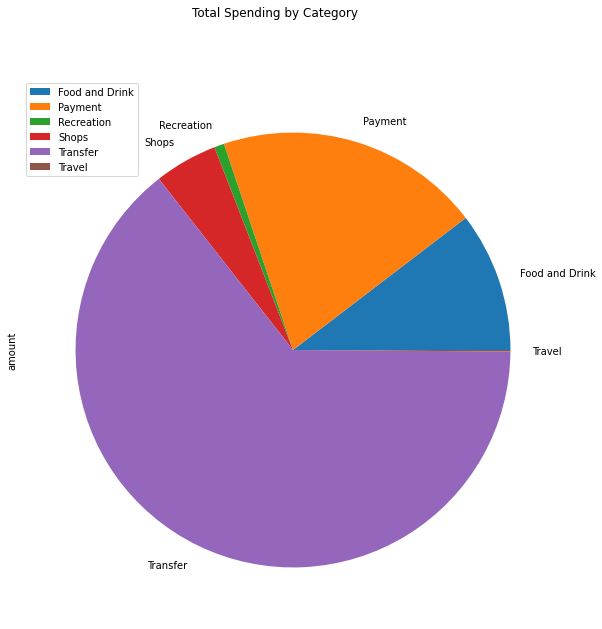

In [ ]:
# Create a spending categories pie chart.
category_expenses.plot(figsize=(20,10), title='Total Spending by Category',kind='pie',subplots=True)

### Calculate the expenses per month

In [ ]:
# Create a DataFrame with the total expenses
monthly_expenses = records_df2['amount'].resample('M').sum()
# Display sample data
monthly_expenses

date
2020-04-30      506.33
2020-05-31    10645.24
2020-06-30    10645.24
2020-07-31    10138.91
Freq: M, Name: amount, dtype: float64

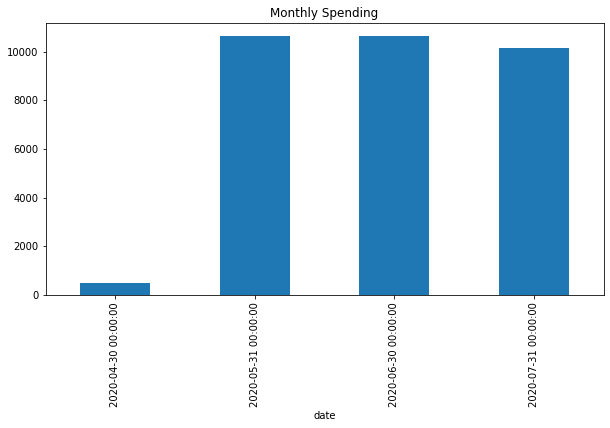

In [ ]:
# Create a spending per month bar chart
monthly_expenses.plot(figsize=(10,5), title='Monthly Spending',kind='bar',subplots=False)